In [1]:
# AUTHOR: Akhila Reddy Kommiti
# COURSE: ADTA 5410
# PROGRAM: Assignment 2
# PURPOSE: To analyse the Oil production data set using advancedanalytics.
#
# PROCESS: By setting the target variable as Log_Cum_Production and cleaning 
#the data such as removing missing values and making use of the advancedanalytics library 
#to impute the data.

# OUTPUT: Plotted various graphs to visualize the correlation and distribution 
#of the  variables 

# HONOR CODE: On my honor, I have neither given
# nor received unauthorized aid on this academic work, to
# include the assistance from others in the class, the use of
# generative AI to produce the original code, or the use of
# code obtained from external sources such as stacked
# overflow, in example. I realize the use of unauthorized
# will at a minimum result in a zero for this assignment and
# and may lead to further honor code disciplinary results

In [2]:
!pip install AdvancedAnalytics

In [3]:
# Pandas library: Used primarily for DataFrames for data manipulation and analysis
import pandas as pd

# NumPy library for numerical computations and handling arrays
import numpy as np

# Statsmodels library for estimating and testing statistical models
import statsmodels.api as sm

# Statsmodels evaluation measures for model performance (e.g., MSE, MAE)
import statsmodels.tools.eval_measures as em

# SciPy's normal distribution functions for working with statistical distributions
from scipy.stats import norm

# Matplotlib for creating static, animated, or interactive plots and graphs
import matplotlib.pyplot as plt

# Scikit-learn function to split datasets into training and testing sets
from sklearn.model_selection import train_test_split

# AdvancedAnalytics library for data preprocessing (Replace, Impute, Encode) and decision tree imputation
from AdvancedAnalytics.ReplaceImputeEncode import ReplaceImputeEncode, DT

# AdvancedAnalytics regression functions for linear regression and stepwise regression
from AdvancedAnalytics.Regression import linreg, stepwise

import seaborn as sns

# show the updated DataFrame to verify the changes
from IPython.display import display

In [10]:
# Starting of data map definition
"""  DATA MAP                                                               """

# Dataset's attribute map. Every attribute (column) in this dictionary is mapped to its corresponding data type (DT), allowable range, or category
attribute_map = {

    #'obs' is the ID field, and a positive integer should be entered there.
    'Obs':    [DT.ID, (1, np.inf)],

    #'Log_Cum_Production' is an interval field that tracks cumulative oil output, which is already log scaled and has an observed range of 8.8 to 14.4.
    'Log_Cum_Production':  [DT.Interval, (8.8, 14.4)],

   #The field 'Log_Proppant_LB' is an interval that indicates the logarithmic value of proppant utilized in pounds, with a range of 6.31 to 17.99.
    'Log_Proppant_LB':  [DT.Interval, (6.31, 17.99)],

   #'Log_Carbonate' is an interval field that contains the logarithmic value of the carbonate composition, which is in the range of -3.98 to 3.78.
    'Log_Carbonate':  [DT.Interval, (-3.98, 3.78)],

   # The logarithmic value of fracturing fluid in gallons, #'Log_Frac_Fluid_GL', is an interval field that ranges from 7.82 to 17.77.
    'Log_Frac_Fluid_GL':  [DT.Interval, (7.82, 17.77)],

   #'Log_GrossPerforatedInterval' is an interval field that contains the gross perforated interval's logarithmic value, which ranges from 4.61 to 8.79.
    'Log_GrossPerforatedInterval':  [DT.Interval, (4.61, 8.79)],

    #The interval variable 'Log_LowerPerforation_xy' represents the logarithmic value of the lower perforation (x-y plane), with a range of 8.51 to 9.62.
    'Log_LowerPerforation_xy':  [DT.Interval, (8.51, 9.62)],

   #'Log_UpperPerforation_xy' is an interval field that contains the logarithmic value of the upper perforation (x-y plane), which has a range of 8.18 to 9.38.
    'Log_UpperPerforation_xy':  [DT.Interval, (8.18, 9.38)],

   # The interval field "Log_TotalDepth" stores the logarithmic value of the total depth, which ranges from 8.58 to 9.64.
    'Log_TotalDepth':  [DT.Interval, (8.58, 9.64)],

    # 'N_Stages' is an interval field that contains the number of stages, which can be anything between two and fourteen.
    'N_Stages':  [DT.Interval, (2, 14)],

    #'X_Well' is an interval field that contains the well's x-coordinate, which ranges from -98.51 to -97.02.
    'X_Well':  [DT.Interval, (-98.51, -97.02)],

   # 'Y_Well' is an interval field that contains the well's y-coordinate, which ranges from 31.88 to 33.40.
    'Y_Well':  [DT.Interval, (31.88, 33.40)],

   # The well operator is represented by the Nominal (categorical) field "Operator."
    'Operator':  [DT.Nominal, (1.0, 28.0)],

   # The Nominal (categorical) field "County" designates the county in which the well is situated.
    'County':  [DT.Nominal, (11.0, 13.0)]
}

""" **********************************************************************  """
#Data map definition ends here



' **********************************************************************  '

In [12]:
oilProduction_df = pd.read_excel(r'C:\Users\akhil\Downloads\OilProduction.xlsx')

In [13]:
# Setting the target variable
target_variable = 'Log_Cum_Production'

In [14]:
# Displaying the first five rows of the dataset
print("Here we are displaying the first five rows of the dataset")
print(oilProduction_df.head())

Here we are displaying the first five rows of the dataset
   Obs  Log_Cum_Production  Log_Proppant_LB  Log_Carbonate  Log_Frac_Fluid_GL  \
0    1           12.238153        13.925315       0.779820          14.764917   
1    2           12.810446        13.191794       0.826584          14.045121   
2    3           11.304855        14.188508       1.943307          14.551309   
3    4           12.921434        13.548937       2.046586          14.668542   
4    5           11.869739        14.707304       0.094671          15.598488   

   Log_GrossPerforatedInterval  Log_LowerPerforation_xy  \
0                     7.926242                 9.135401   
1                     7.866722                 9.113609   
2                     8.061802                 9.033842   
3                     7.571474                 9.145055   
4                     7.537963                 9.315331   

   Log_UpperPerforation_xy  Log_TotalDepth  N_Stages    X_Well    Y_Well  \
0                 8.8255

In [15]:
# Checking the data types for three columns

print('Log_Cum_Production: ',oilProduction_df.Log_Cum_Production.dtypes)
print('Log_TotalDepth: ',oilProduction_df.Log_TotalDepth.dtypes)
print('County: ',oilProduction_df.County.dtypes)

Log_Cum_Production:  float64
Log_TotalDepth:  float64
County:  float64


In [16]:
# We are examining the dimensions of the dataset by counting its rows and columns
a, b = oilProduction_df.shape

print("Number of rows:", a)
print("Number of columns:", b)

Number of rows: 4752
Number of columns: 14


In [17]:
# We are displaying the names of the columns in the dataset
print(oilProduction_df.columns.tolist())

['Obs', 'Log_Cum_Production', 'Log_Proppant_LB', 'Log_Carbonate', 'Log_Frac_Fluid_GL', 'Log_GrossPerforatedInterval', 'Log_LowerPerforation_xy', 'Log_UpperPerforation_xy', 'Log_TotalDepth', 'N_Stages', 'X_Well', 'Y_Well', 'Operator', 'County']


In [18]:
# We are inspecting the contents of the DataFrame
print("Data Summary:")
print(oilProduction_df.info())  # Overview of data types and non-null values


Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4752 entries, 0 to 4751
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Obs                          4752 non-null   int64  
 1   Log_Cum_Production           4751 non-null   float64
 2   Log_Proppant_LB              4751 non-null   float64
 3   Log_Carbonate                4751 non-null   float64
 4   Log_Frac_Fluid_GL            4751 non-null   float64
 5   Log_GrossPerforatedInterval  4751 non-null   float64
 6   Log_LowerPerforation_xy      4751 non-null   float64
 7   Log_UpperPerforation_xy      4751 non-null   float64
 8   Log_TotalDepth               4751 non-null   float64
 9   N_Stages                     4751 non-null   float64
 10  X_Well                       4751 non-null   float64
 11  Y_Well                       4751 non-null   float64
 12  Operator                     4751 non-null   float64
 13  Coun

In [19]:
print("\nStatistical Summary:")
print(oilProduction_df.describe())  # Statistical summary for numerical columns


Statistical Summary:
              Obs  Log_Cum_Production  Log_Proppant_LB  Log_Carbonate  \
count  4752.00000         4751.000000      4751.000000    4751.000000   
mean   2376.50000           12.600596        14.276674       1.329109   
std    1371.92857            0.690231         0.771792       0.863187   
min       1.00000            8.798606         6.309918      -3.981836   
25%    1188.75000           12.194906        13.913268       0.839797   
50%    2376.50000           12.674387        14.301217       1.428139   
75%    3564.25000           13.076443        14.713067       1.930246   
max    4752.00000           14.382916        17.988989       3.777379   

       Log_Frac_Fluid_GL  Log_GrossPerforatedInterval  \
count        4751.000000                  4751.000000   
mean           14.732609                     7.720973   
std             0.792053                     0.400409   
min             7.824046                     4.605170   
25%            14.527474           

In [20]:
# We are identifying any missing values in the dataset
print("\nMissing Values:")
print(oilProduction_df.isnull().sum())  # Count of missing values in each column




Missing Values:
Obs                            0
Log_Cum_Production             1
Log_Proppant_LB                1
Log_Carbonate                  1
Log_Frac_Fluid_GL              1
Log_GrossPerforatedInterval    1
Log_LowerPerforation_xy        1
Log_UpperPerforation_xy        1
Log_TotalDepth                 1
N_Stages                       1
X_Well                         1
Y_Well                         1
Operator                       1
County                         1
dtype: int64


In [21]:
# We are categorizing the columns into numerical and categorical variables
# (This step is crucial for analysis and plotting)
numerical_cols = oilProduction_df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = oilProduction_df.select_dtypes(include=['object']).columns

print("\nNumerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)




Numerical Columns: Index(['Obs', 'Log_Cum_Production', 'Log_Proppant_LB', 'Log_Carbonate',
       'Log_Frac_Fluid_GL', 'Log_GrossPerforatedInterval',
       'Log_LowerPerforation_xy', 'Log_UpperPerforation_xy', 'Log_TotalDepth',
       'N_Stages', 'X_Well', 'Y_Well', 'Operator', 'County'],
      dtype='object')
Categorical Columns: Index([], dtype='object')


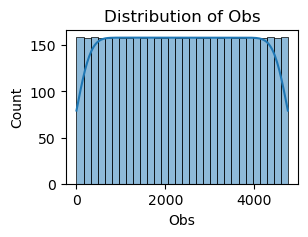

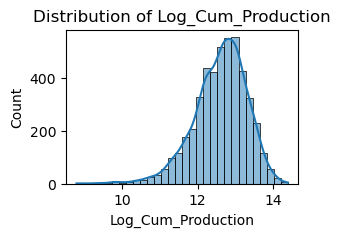

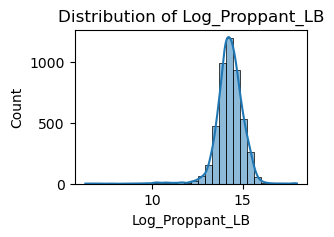

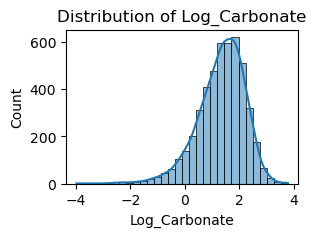

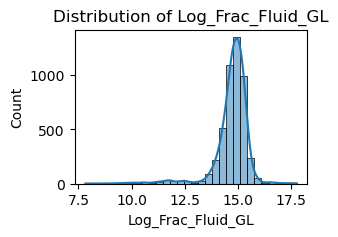

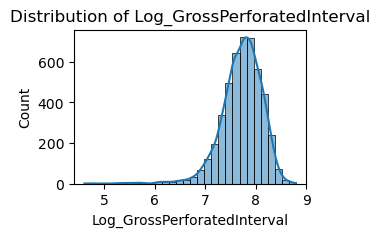

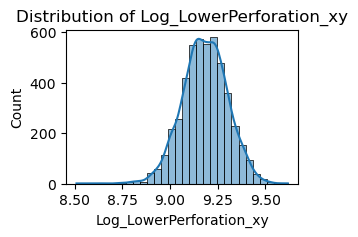

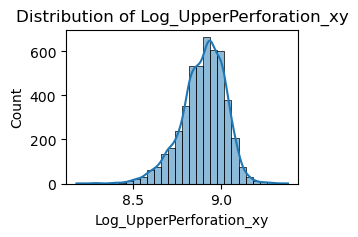

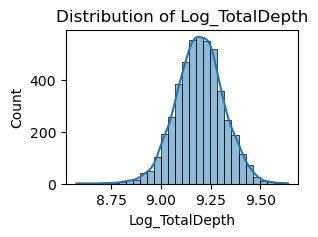

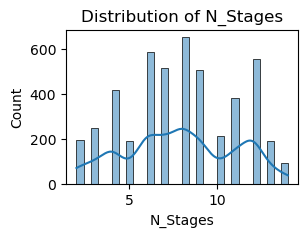

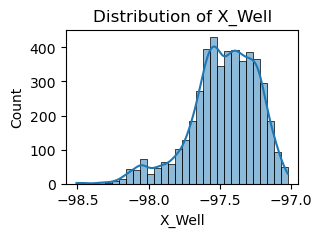

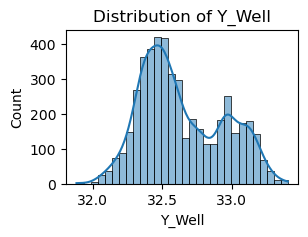

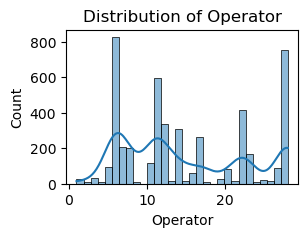

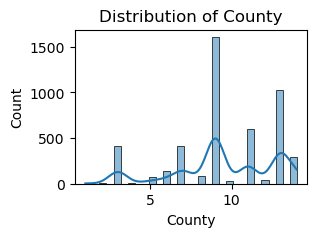

In [22]:
# We are visualizing the distributions of numerical data
for col in numerical_cols:
    plt.figure(figsize=(3, 2))
    sns.histplot(oilProduction_df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()



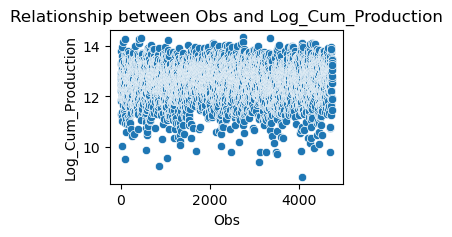

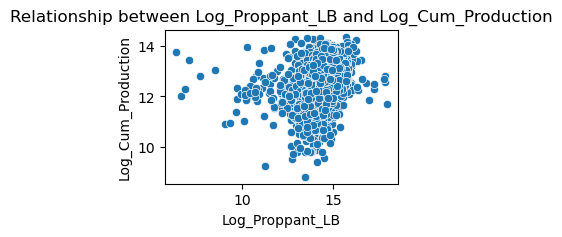

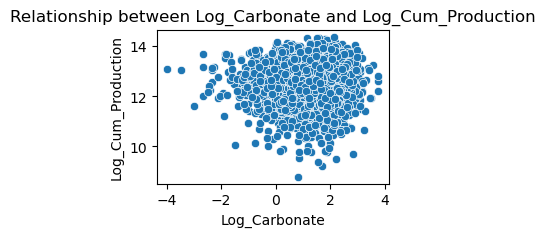

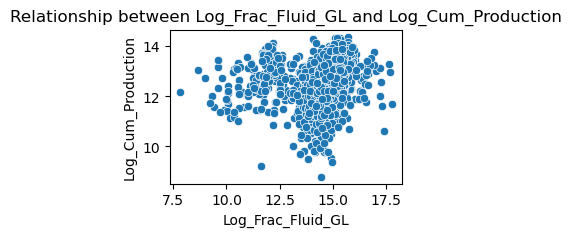

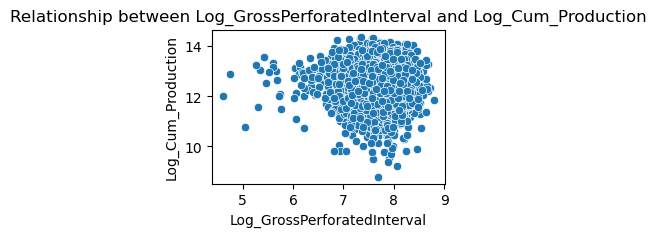

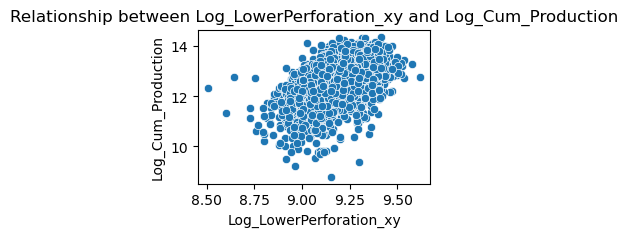

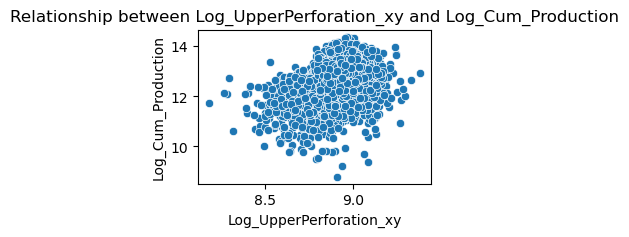

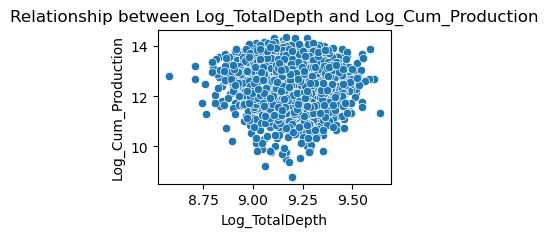

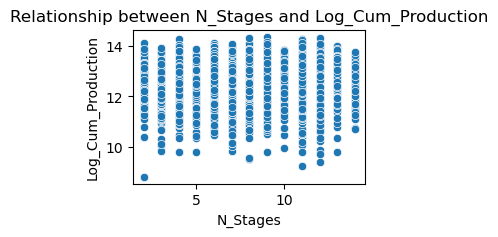

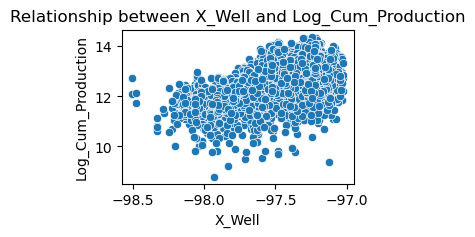

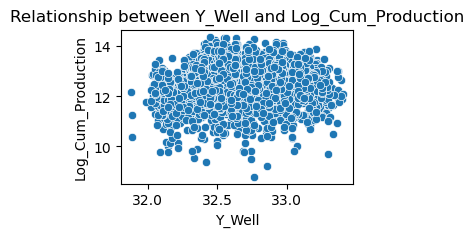

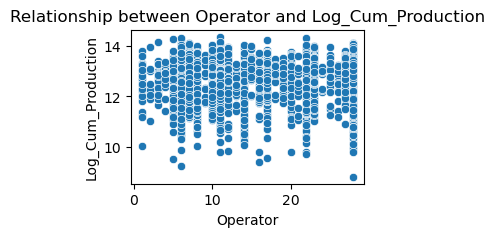

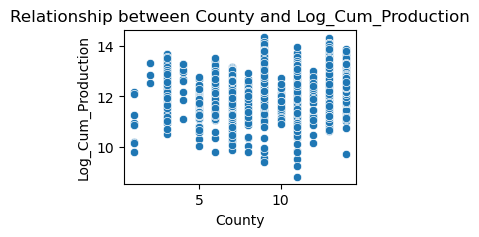

In [23]:
# We are visualizing the relationships between features and the target variable (Log_Cum_Production)
for col in numerical_cols:
    if col != target_variable:
        plt.figure(figsize=(3, 2))
        sns.scatterplot(x=oilProduction_df[col], y=oilProduction_df[target_variable])
        plt.title(f'Relationship between {col} and {target_variable}')
        plt.show()



In [24]:
# We are plotting categorical variables
for col in categorical_cols:
    plt.figure(figsize=(3, 2))
    sns.countplot(x=oilProduction_df[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()



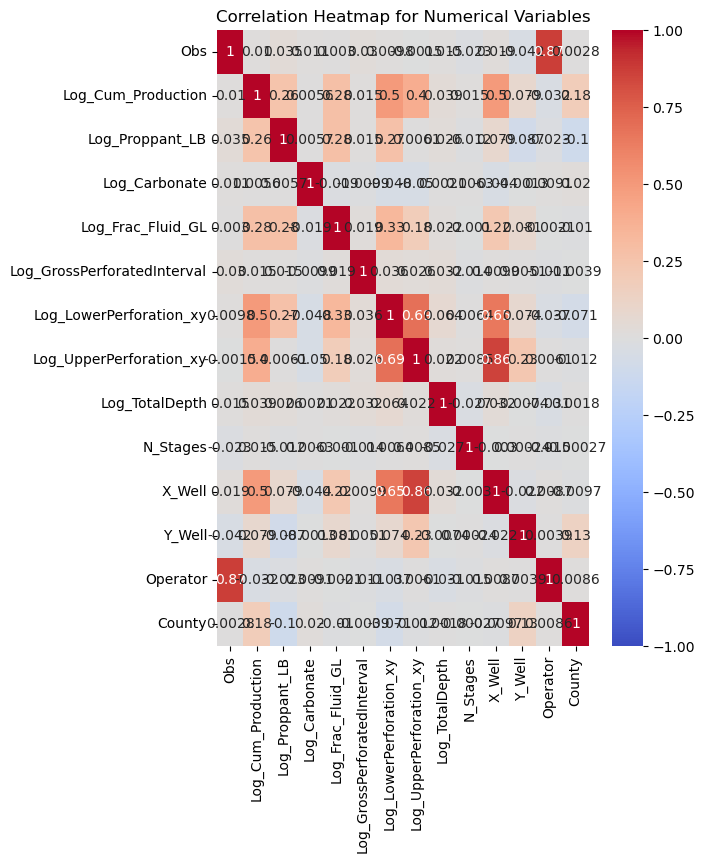

In [25]:
# We are generating a heatmap to visualize correlations among numerical features
plt.figure(figsize=(6, 8))
sns.heatmap(oilProduction_df[numerical_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap for Numerical Variables")
plt.show()



In [ ]:
# We are using a pairplot to examine the relationships between numerical features
sns.pairplot(oilProduction_df[numerical_cols])
plt.show()

In [ ]:
plt.figure(figsize=(9, 6))
sns.boxplot(x='Operator', y='Log_Cum_Production', data=oilProduction_df)

# Add title and labels
plt.title('Boxplot of Log_Cum_Production by Operator')
plt.xlabel('Operator')
plt.ylabel('Log_Cum_Production')

# Displaying the plot
plt.show()

In [ ]:
df_no_obs = oilProduction_df.drop(columns=['Obs'], errors='ignore')

# For the last number column, make a histogram.
df_no_obs.hist(figsize=(12, 9), bins=20, edgecolor='blue', color='skyblue')

# Showing the plot
plt.tight_layout()
plt.show()

In [ ]:
# For a categorical column, like "Operator," create a countplot.
plt.figure(figsize=(9, 6))
sns.countplot(x='Operator', data=oilProduction_df)
# Adding title and labels
plt.title('Frequency chart of Operator')
plt.xlabel('Operator')
plt.ylabel('Frequency')
# Show the plot
plt.show()